In [1]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [2]:
TRAINING_DIR = '../data/training'
X, y, positions, file_names = get_data(TRAINING_DIR)

In [16]:
import pandas as pd
from nltk.tokenize import word_tokenize
from itertools import chain

words, docs = [], []
for d in X:
    for w in word_tokenize(d):
        docs.append(d)
        words.append(w)

print(len(words))
print(len(docs))
df = pd.DataFrame(data={'word':words, 'len': [len(w) for w in words], 'doc': docs})

2572624
2572624


In [17]:
df.head()

,doc,len,word
0,Definitely remind anyone looking at your forec...,10,Definitely
1,Definitely remind anyone looking at your forec...,6,remind
2,Definitely remind anyone looking at your forec...,6,anyone
3,Definitely remind anyone looking at your forec...,7,looking
4,Definitely remind anyone looking at your forec...,2,at


In [10]:
df.len.describe()

count    2.572624e+06
mean     4.143670e+00
std      2.903101e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      1.106000e+03
Name: len, dtype: float64

In [11]:
max(df.len)

1106

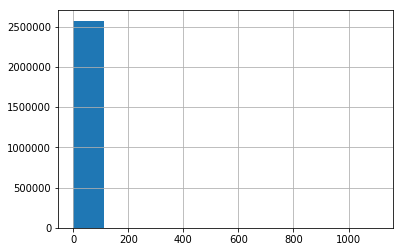

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.len.hist()

In [31]:
max_words = df[df.len > 70]

In [32]:
len(max_words)

83

In [33]:
list(max_words.word)

['//www.rhythmsystems.com/blog/bid/87071/fire-to-protect-your-core-values',
 '//www.monkey-and-banana.com/wp-content/uploads/2009/10/star-wars-droids.jpg',
 '//stackoverflow.uservoice.com/pages/1722-general/suggestions/118664-add-support-for-abbr-',
 '//forums.electronicarts.co.uk/battlefield-3-pc/1448520-howto-customize-chatbox-bf3.html',
 '//forums.electronicarts.co.uk/battlefield-3-pc/1448520-howto-customize-chatbox-bf3.html',
 'instant-powercut-and-everything-goes-black-and-the-system-suddenly-shuts-off',
 '//www.fifa.com/mm/document/footballdevelopment/refereeing/02/36/01/11/27_06_2014_new',
 '//www.fifa.com/mm/document/footballdevelopment/refereeing/81/42/36/log2013en_neutral.pdf',
 '//www.fuzzyyellowballs.com/video-tennis-lessons/forehand/advanced-forehand-technique/wrist-contact/',
 '//www.usta.com/Improve-Your-Game/Health-Fitness/Injuries-Prevention-and-Recovery/Wrist_Injuries/',
 '//www.king5.com/story/news/local/seattle/2015/07/31/ivars-salmon-house-minimum-wage-tip-service-

In [50]:
from nltk.tokenize import word_tokenize
def get_sliding_words(text, n, chunks=None, wordFilter=None):
    segments = []
    words = word_tokenize(text)
    x = len(words)
    if chunks:
        n = round(x / chunks)
    i = 0
    overlap = round(n/2)
    for i in range(0, x-n-overlap, overlap):
        segments.append(' '.join(words[i:i+n]))
    segments.append(' '.join(words[i+overlap:]))
    if wordFilter:
        segments = [wordFilter(s) for s in segments]
    return segments

In [51]:
text='test1 test2 test3 test4 test5 test7 test8 test9 test1 test2 test3 test4 test5 test7 test8 test9'
get_sliding_words(text, n=6)

['test1 test2 test3 test4 test5 test7',
 'test4 test5 test7 test8 test9 test1',
 'test8 test9 test1 test2 test3 test4',
 'test2 test3 test4 test5 test7 test8 test9']

In [25]:
def get_segments(text, n, chunks=None, wordFilter=None):
    segments = []
    words = word_tokenize(text)
    x = len(words)
    if chunks:
        n = round(x / chunks)
    i = 0
    for i in range(0, x-n, n):
        segments.append(' '.join(words[i:i+n]))
    segments.append(' '.join(words[i+n:]))
    if wordFilter:
        segments = [wordFilter(s) for s in segments]
    return segments

In [42]:
import math
l = len(word_tokenize(text))
split_seq(word_tokenize(text), 6)

['test1 test2 test3 test4 test5',
 'test7 test8 test9 test1 test2 test3',
 'test4 test5 test7 test8 test9']

In [45]:
old_get_segments(text, 6, None)

['test1 test2 test3 test4 test5 test7',
 'test8 test9 test1 test2 test3 test4 test5 test7 test8 test9']

In [47]:
get_segments(text, 6, None)

['test1 test2 test3 test4 test5',
 'test7 test8 test9 test1 test2 test3',
 'test4 test5 test7 test8 test9']

In [46]:
def get_segments(text, n, chunks, wordFilter=None):
    words = word_tokenize(text)
    segments = split_seq(words, n, chunks)
    if wordFilter:
        segments = [wordFilter(s) for s in segments]
    return segments

In [41]:
def split_seq(seq, depth, breath=None):
    if not breath:
        breath = math.ceil(len(seq) / depth)
    newseq = []
    splitsize = 1.0/breath*len(seq)
    for i in range(breath):
        newseq.append(' '.join(seq[int(round(i*splitsize)):int(round((i+1)*splitsize))]))
    return newseq

In [44]:
def old_get_segments(text, n, chunks, wordFilter=None):
    segments = []
    words = word_tokenize(text)
    x = len(words)
    if chunks:
        n = round(x / chunks)
    i = 0
    for i in range(0, x-x%n-n, n):
        segments.append(' '.join(words[i:i+n]))
    segments.append(' '.join(words[i+n:]))
    if wordFilter:
        segments = [wordFilter(s) for s in segments]
    return segments